# Multiomics modeling by Khushbu Saradva

Let's look at the paper *"Multiomics modeling of the immunome, transcriptome, microbiome, proteome and metabolome adaptations during human pregnancy"* by **Ghaemi et al. 2019** (`https://academic.oup.com/bioinformatics/article/35/1/95/5047759`).
The idea is to use different modalities (measurements collected from the immune system, microbiome, etc.) to characterize biological changes during pregnancy.
This includes whether we can predict the gestational age of a mother solely based on the collected biomarkers.

## Load the data

I loaded the data from `multiomics_data.pickle` using `pickle`.
DataFrame containing preprocessed data from the paper (the original data from their paper is a bit messy). The data contains several meta attributes as well as the different modalities.

Meta attributes include:

* `Sex`: sex of the baby
* `timepoint`: 1-3 correspond to the three trimesters, 4 corresponds to postpartum
* `gestational_age`: time of sampling

Modalites are:
    
* `cellfree_rna`
* `metabolomics`
* `microbiome`
* `plasma_luminex`
* `serum_luminex`
* `immune_system`
* `plasma_somalogic`

For more details pleaase see the paper.

In [1]:
# code for loading the data

import numpy as np
import pickle

with open("multiomics_data.pickle", "rb") as file:
    data_multiomics = pickle.load(file)

data_multiomics.head()

Training/Validation Gates ID       MRN Study Subject ID Number     Sex  \
                                                                           
0                   T  PTLG002  16661779                   10565    Male   
1                   T  PTLG002  16661779                   10565    Male   
2                   T  PTLG002  16661779                   10565    Male   
3                   T  PTLG002  16661779                   10565    Male   
4                   T  PTLG004  23587868                   10603  Female   

  sex_bin timepoint gestational_age cellfree_rna                ...  \
                                       0_C2orf76      1_ACTL10  ...   
0       1         1              11     0.312437 -1.892930e-16  ...   
1       1         2              18     0.312437 -1.892930e-16  ...   
2       1         3              32     0.312437 -1.892930e-16  ...   
3       1         4              45     0.312437 -1.892930e-16  ...   
4       0         1              11     5.204209  1.734736e+00  ...   

  plasma_somalogic                                                             \
       1290_UBE2G2 1291_TAGLN2 1292_ATP5O 1293_POMC 1294_CRYZL1 1295_SERPINF1   
0           4804.4      2233.0     3610.9     715.8       151.4       37885.8   
1           4086.0      2160.5     2260.4     825.2       161.0       41821.5   
2           4328.0      1818.4     2445.2    1241.8       194.6       45526.1   
3           3442.4      2661.4     3879.2     703.6       153.7       36862.5   
4           4261.9      1804.6     1470.6     526.8       163.0       38938.3   

                                              
  1296_CTSF 1297_FTCD 1298_USP25 1299_PLXNB2  
0    1479.1    3261.8      561.3      3227.0  
1    1465.1    1839.8      597.8      3366.0  
2    1428.3    3057.2      625.7      8703.7  
3    1063.6    7339.7      593.2      2918.9  
4    1170.1    1036.8      552.8      3457.1  

[5 rows x 61274 columns]

In [2]:
# look at the immune system
data_multiomics["immune_system"]

,0_Bcells,1_CD16+CD56-NKcells,2_CD4+Tcells_mem,3_CD4+Tcells_naive,4_CD4+Tcells,5_CD45RA+Tregs,6_CD45RA-Tregs,7_CD56+CD16-NKcells,8_CD7+NKcells,9_CD8+Tcells_mem,...,524_M-MDSC_STAT5_Unstim,525_mDCs_STAT5_Unstim,526_ncMCs_STAT5_Unstim,527_pDCs_STAT5_Unstim,528_Tbet+CD4+Tcells_mem_STAT5_Unstim,529_Tbet+CD4+Tcells_naive_STAT5_Unstim,530_Tbet+CD8+Tcells_mem_STAT5_Unstim,531_Tbet+CD8+Tcells_naive_STAT5_Unstim,532_TCRgd+Tcells_STAT5_Unstim,533_Tregs_STAT5_Unstim
0,0.053164,0.054978,0.297875,0.136289,0.445832,0.002570,0.013848,0.007052,0.070836,0.118884,...,0.998954,0.953637,1.082629,0.808610,0.504269,0.757424,0.462045,0.454665,0.443859,0.529431
1,0.052857,0.069794,0.279917,0.140350,0.430839,0.002470,0.010923,0.004759,0.080245,0.127831,...,0.930847,0.822618,0.931126,0.728738,0.613059,0.852393,0.506981,0.474408,0.491691,0.574133
2,0.053202,0.050829,0.277997,0.187659,0.479078,0.003473,0.013359,0.005302,0.063781,0.104513,...,1.077824,0.970954,1.011011,0.749277,0.752882,0.813249,0.560379,0.481862,0.505706,0.640245
3,0.049906,0.090496,0.266336,0.156263,0.432904,0.003071,0.014459,0.004318,0.101386,0.115243,...,0.976888,0.918164,1.028114,0.790166,0.505349,0.648406,0.464522,0.445444,0.438285,0.573058
4,0.103067,0.004128,0.162746,0.103950,0.270840,0.003198,0.007988,0.007153,0.090763,0.057064,...,0.890405,0.800468,1.067789,0.563615,0.464563,1.004497,0.378557,0.423530,0.332368,0.447904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,0.091121,0.126476,0.143706,0.048464,0.195000,0.004209,0.007141,0.002082,0.169851,0.148295,...,1.108355,0.797910,0.892495,0.753036,0.531549,0.831332,0.425889,0.412894,0.378466,0.558786
64,0.070466,0.070750,0.247024,0.194472,0.462523,0.003692,0.009168,0.002431,0.077975,0.082531,...,0.913312,0.717190,0.758279,0.604196,0.600195,1.291782,0.443706,0.462645,0.371572,0.861217
65,0.061253,0.041134,0.236547,0.237067,0.496289,0.005648,0.011004,0.001758,0.047221,0.093727,...,0.954390,0.684022,0.740287,0.613545,0.604309,1.125464,0.434801,0.458300,0.406314,0.587349
66,0.052479,0.030232,0.210169,0.245472,0.478379,0.007130,0.008604,0.003692,0.039343,0.084122,...,0.938450,0.762454,0.795962,0.607801,0.622691,1.121270,0.443660,0.474322,0.411770,0.554895


## Data Pipeline

**Figure 1:**<br/>
<img src="assets/task1_multiomics_fig1.jpeg">

# Figure 1B - Number of measurements per modality

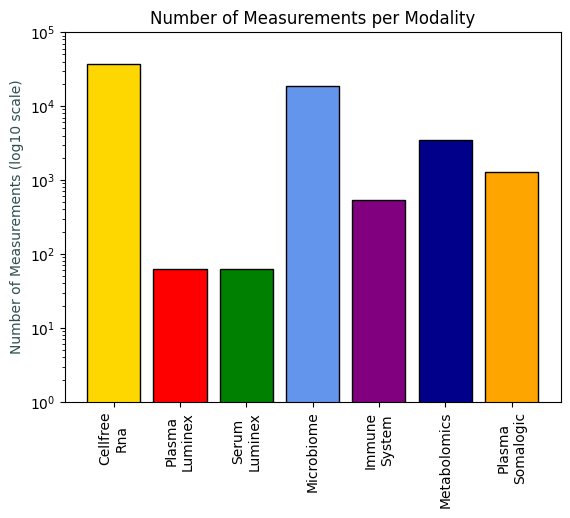

In [3]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

modalities = ['cellfree_rna', 'plasma_luminex', 'serum_luminex', 'microbiome','immune_system' , 'metabolomics' , 'plasma_somalogic']
num_measurements = [data_multiomics[m].shape[1] for m in modalities]

upper_limit = 0
while 10**upper_limit < max(num_measurements):
    upper_limit += 1

plt.bar(range(len(modalities)), num_measurements, color=['gold', 'red', 'green', 'cornflowerblue', 'purple', 'darkblue', 'orange'], edgecolor='black')
plt.yscale('log')
plt.ylim(1, 10**upper_limit)
plt.yticks([10**i for i in range(upper_limit+1)])
plt.ylabel('Number of Measurements (log10 scale)', color='darkslategrey')
plt.title('Number of Measurements per Modality', color='black')
plt.xticks(range(len(modalities)), [m.replace('_', '\n').title() for m in modalities], rotation=90, ha='center')
plt.show()

# Figure 1C - Number of PCs needed to capture 90% variance per modality

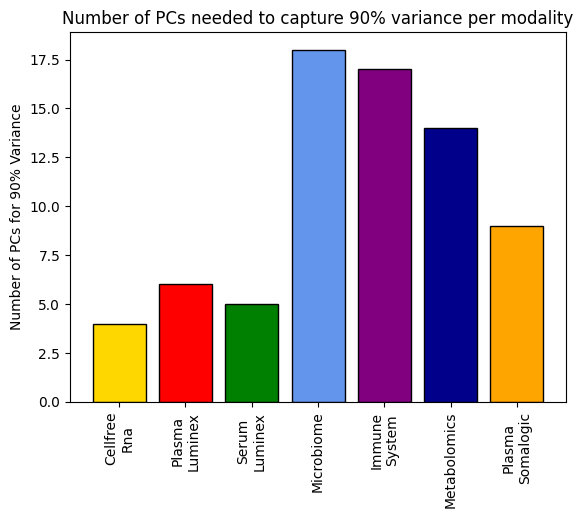

In [4]:
num_pcs = []
for m in modalities:
    pca = PCA(n_components=0.9)
    pca.fit(data_multiomics[m])
    num_pcs.append(pca.n_components_)
plt.bar(modalities, num_pcs, color=['gold', 'red', 'green', 'cornflowerblue', 'purple', 'darkblue', 'orange'], edgecolor='black')
plt.ylabel('Number of PCs for 90% Variance')
plt.title('Number of PCs needed to capture 90% variance per modality')
plt.xticks(range(len(modalities)), [m.replace('_', '\n').title() for m in modalities], rotation=90, ha='center')
plt.show()

2. Analysis & Overview

 - <div class="alert alert-block alert-success">
<b>Multiomics analysis:</b> The authors conducted a multiomics analysis of samples collected from 17 pregnant women at 51 different timepoints throughout pregnancy and 6 weeks postpartum. They analyzed seven biological modalities, including cell-free transcriptomics, antibody-based cytokine measurements in plasma and serum, microbiomic analyses, mass cytometric analyses of whole blood, untargeted metabolomics, and targeted proteomics analysis of plasma.
</div>
  
 - <div class="alert alert-block alert-success">
<b>Investigate correlations:</b> The authors wanted to investigate how these different modalities are correlated with each other and how they change throughout pregnancy. They used Bonferroni's method to adjust the P-values and a nonparametric multivariate model based on random forests to interpolate missing values.
</div>

 - <div class="alert alert-block alert-success">
<b>Comprehensive view:</b> They found that the datasets produced different levels of modularity, as measured by the number of principal components needed to account for 90% variance of each dataset, and that the modularity of the datasets was not correlated with the number of measurements available with providing comprehensive view by figures
</div>

 - <div class="alert alert-block alert-success">
<b>Authors suggest:</b> The authors aim to convey to the reader that their multiomics analysis provides a comprehensive view of the changes in the immunome, transcriptome, microbiome, proteome, and metabolome adaptations during human pregnancy, and that the different modalities are highly correlated with each other, suggesting coordinated adaptations across multiple biological systems.
</div>

## Prediction model for `gestational_age`

1. I Pick **All modalities** and train five models to predict `gestational_age` **for each of them**

For example, one trained model could based on `ML` model, the `immune_system` data as input, and `gestational_age` as output.

Importing libraries

In [5]:
import numpy as np
import pandas as pd
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, Matern
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import ElasticNet

In [6]:
# Load data
with open("multiomics_data.pickle", "rb") as file:
    data_multiomics = pickle.load(file)

# Define input and output variables
X_crna = data_multiomics["cellfree_rna"]
X_plu = data_multiomics["plasma_luminex"]
X_sel = data_multiomics["serum_luminex"]
X_mic = data_multiomics["microbiome"]
X_imm = data_multiomics["immune_system"]
X_met = data_multiomics["metabolomics"]
X_som = data_multiomics["plasma_somalogic"]
y = data_multiomics["gestational_age"]

# Scale features for each modality
scaler = StandardScaler()
X_crna_scaled = scaler.fit_transform(X_crna)
X_plu_scaled = scaler.fit_transform(X_plu)
X_sel_scaled = scaler.fit_transform(X_sel)
X_mic_scaled = scaler.fit_transform(X_mic)
X_imm_scaled = scaler.fit_transform(X_imm)
X_met_scaled = scaler.fit_transform(X_met)
X_som_scaled = scaler.fit_transform(X_som)

# Split data into training and testing sets for each modality
train_size = int(len(X_imm_scaled) * 0.8)

X_crna_train, X_crna_test = X_crna_scaled[:train_size], X_crna_scaled[train_size:]
X_plu_train, X_plu_test = X_plu_scaled[:train_size], X_plu_scaled[train_size:]
X_sel_train, X_sel_test = X_sel_scaled[:train_size], X_sel_scaled[train_size:]
X_mic_train, X_mic_test = X_mic_scaled[:train_size], X_mic_scaled[train_size:]
X_imm_train, X_imm_test = X_imm_scaled[:train_size], X_imm_scaled[train_size:]
X_met_train, X_met_test = X_met_scaled[:train_size], X_met_scaled[train_size:]
X_som_train, X_som_test = X_som_scaled[:train_size], X_som_scaled[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

#Linear Regression
# Create and fit Linear Regression model, Predict gestational age on test data and Calculate MSE and R2 score
lr_model_crna = LinearRegression()
lr_model_crna.fit(X_crna_train, y_train)
y_pred_crna = lr_model_crna.predict(X_crna_test)
mse_lr_crna = mean_squared_error(y_test, y_pred_crna)
r2_lr_crna = r2_score(y_test, y_pred_crna)

print("Linear Regression Model (cellfree_rna) MSE: ", mse_lr_crna)
print("Linear Regression Model (cellfree_rna) R2 Score: ", r2_lr_crna)

lr_model_plu = LinearRegression()
lr_model_plu.fit(X_plu_train, y_train)
y_pred_plu = lr_model_plu.predict(X_plu_test)
mse_lr_plu = mean_squared_error(y_test, y_pred_plu)
r2_lr_plu = r2_score(y_test, y_pred_plu)

print("Linear Regression Model (plasma_luminex) MSE: ", mse_lr_plu)
print("Linear Regression Model (plasma_luminex) R2 Score: ", r2_lr_plu)

lr_model_sel = LinearRegression()
lr_model_sel.fit(X_sel_train, y_train)
y_pred_sel = lr_model_sel.predict(X_sel_test)
mse_lr_sel = mean_squared_error(y_test, y_pred_sel)
r2_lr_sel = r2_score(y_test, y_pred_sel)

print("Linear Regression Model (serum_luminex) MSE: ", mse_lr_sel)
print("Linear Regression Model (serum_luminex) R2 Score: ", r2_lr_sel)

lr_model_mic = LinearRegression()
lr_model_mic.fit(X_mic_train, y_train)
y_pred_mic = lr_model_mic.predict(X_mic_test)
mse_lr_mic = mean_squared_error(y_test, y_pred_mic)
r2_lr_mic = r2_score(y_test,y_pred_mic)

print("Linear Regression Model (microbiome) MSE: ", mse_lr_mic)
print("Linear Regression Model (microbiome) R2 Score: ", r2_lr_mic)


lr_model_imm = LinearRegression()
lr_model_imm.fit(X_imm_train, y_train)
y_pred_imm = lr_model_imm.predict(X_imm_test)
mse_lr_imm = mean_squared_error(y_test, y_pred_imm)
r2_lr_imm = r2_score(y_test, y_pred_imm)

print("Linear Regression Model (immune_system) MSE: ", mse_lr_imm)
print("Linear Regression Model (immune_system) R2 Score: ", r2_lr_imm)

lr_model_met = LinearRegression()
lr_model_met.fit(X_met_train, y_train)
y_pred_met = lr_model_met.predict(X_met_test)
mse_lr_met = mean_squared_error(y_test, y_pred_met)
r2_lr_met = r2_score(y_test, y_pred_met)

print("Linear Regression Model (metabolomics) MSE: ", mse_lr_met)
print("Linear Regression Model (metabolomics) R2 Score: ", r2_lr_met)


lr_model_som = LinearRegression()
lr_model_som.fit(X_som_train, y_train)
y_pred_som = lr_model_som.predict(X_som_test)
mse_lr_som = mean_squared_error(y_test, y_pred_som)
r2_lr_som = r2_score(y_test, y_pred_som)

print("Linear Regression Model (plasma_somalogic) MSE: ", mse_lr_som)
print("Linear Regression Model (plasma_somalogic) R2 Score: ", r2_lr_som)

#Random Forest
#fit Random Forest model for each modality, predict gestational age on test data, and calculate MSE and R2 score

rf_model_crna = RandomForestRegressor()
rf_model_crna.fit(X_crna_train, y_train)
y_pred_crna = rf_model_crna.predict(X_crna_test)
mse_rf_crna = mean_squared_error(y_test, y_pred_crna)
r2_rf_crna = r2_score(y_test, y_pred_crna)

print("Random Forest Model (cellfree_rna) MSE: ", mse_rf_crna)
print("Random Forest Model (cellfree_rna) R2 Score: ", r2_rf_crna)

rf_model_plu = RandomForestRegressor(random_state=42)
rf_model_plu.fit(X_plu_train, y_train)
y_pred_plu = rf_model_plu.predict(X_plu_test)
mse_rf_plu = mean_squared_error(y_test, y_pred_plu)
r2_rf_plu = r2_score(y_test, y_pred_plu)

print("Random Forest Model (plasma_luminex) MSE: ", mse_rf_plu)
print("Random Forest Model (plasma_luminex) R2 Score: ", r2_rf_plu)

rf_model_sel = RandomForestRegressor(random_state=42)
rf_model_sel.fit(X_sel_train, y_train)
y_pred_sel = rf_model_sel.predict(X_sel_test)
mse_rf_sel = mean_squared_error(y_test, y_pred_sel)
r2_rf_sel = r2_score(y_test, y_pred_sel)

print("Random Forest Model (serum_luminex) MSE: ", mse_rf_sel)
print("Random Forest Model (serum_luminex) R2 Score: ", r2_rf_sel)

rf_model_mic = RandomForestRegressor(random_state=42)
rf_model_mic.fit(X_mic_train, y_train)
y_pred_mic = rf_model_mic.predict(X_mic_test)
mse_rf_mic = mean_squared_error(y_test, y_pred_mic)
r2_rf_mic = r2_score(y_test, y_pred_mic)

print("Random Forest Model (microbiome) MSE: ", mse_rf_mic)
print("Random Forest Model (microbiome) R2 Score: ", r2_rf_mic)

rf_model_imm = RandomForestRegressor(random_state=42)
rf_model_imm.fit(X_imm_train, y_train)
y_pred_imm = rf_model_imm.predict(X_imm_test)
mse_rf_imm = mean_squared_error(y_test, y_pred_imm)
r2_rf_imm = r2_score(y_test, y_pred_imm)

print("Random Forest Model (immune_system) MSE: ", mse_rf_imm)
print("Random Forest Model (immune_system) R2 Score: ", r2_rf_imm)

rf_model_met = RandomForestRegressor(random_state=42)
rf_model_met.fit(X_met_train, y_train)
y_pred_met = rf_model_met.predict(X_met_test)
mse_rf_met = mean_squared_error(y_test, y_pred_met)
r2_rf_met = r2_score(y_test, y_pred_met)

print("Random Forest Model (metabolomics) MSE: ", mse_rf_met)
print("Random Forest Model (metabolomics) R2 Score: ", r2_rf_met)

rf_model_som = RandomForestRegressor(random_state=42)
rf_model_som.fit(X_som_train, y_train)
y_pred_som = rf_model_som.predict(X_som_test)
mse_rf_som = mean_squared_error(y_test, y_pred_som)
r2_rf_som = r2_score(y_test, y_pred_som)

print("Random Forest Model (plasma_somalogic) MSE: ", mse_rf_som)
print("Random Forest Model (plasma_somalogic) R2 Score: ", r2_rf_som)


#XGBoost Regression

xgb_model_crna = XGBRegressor()
xgb_model_crna.fit(X_crna_train, y_train)
y_pred_crna = xgb_model_crna.predict(X_crna_test)
mse_xgb_crna = mean_squared_error(y_test, y_pred_crna)
r2_xgb_crna = r2_score(y_test, y_pred_crna)

print("XGBoost Model (cellfree_rna) MSE: ", mse_xgb_crna)
print("XGBoost Model (cellfree_rna) R2 Score: ", r2_xgb_crna)

xgb_model_plu = XGBRegressor(random_state=42)
xgb_model_plu.fit(X_plu_train, y_train)
y_pred_plu = xgb_model_plu.predict(X_plu_test)
mse_xgb_plu = mean_squared_error(y_test, y_pred_plu)
r2_xgb_plu = r2_score(y_test, y_pred_plu)

print("XGBoost Model (plasma_luminex) MSE: ", mse_xgb_plu)
print("XGBoost Model (plasma_luminex) R2 Score: ", r2_xgb_plu)

xgb_model_sel = XGBRegressor(random_state=42)
xgb_model_sel.fit(X_sel_train, y_train)
y_pred_sel = xgb_model_sel.predict(X_sel_test)
mse_xgb_sel = mean_squared_error(y_test, y_pred_sel)
r2_xgb_sel = r2_score(y_test, y_pred_sel)

print("XGBoost Model (serum_luminex) MSE: ", mse_xgb_sel)
print("XGBoost Model (serum_luminex) R2 Score: ", r2_xgb_sel)

xgb_model_mic = XGBRegressor(random_state=42)
xgb_model_mic.fit(X_mic_train, y_train)
y_pred_mic = xgb_model_mic.predict(X_mic_test)
mse_xgb_mic = mean_squared_error(y_test, y_pred_mic)
r2_xgb_mic = r2_score(y_test, y_pred_mic)

print("XGBoost Model (microbiome) MSE: ", mse_xgb_mic)
print("XGBoost Model (microbiome) R2 Score: ", r2_xgb_mic)

xgb_model_imm = XGBRegressor(random_state=42)
xgb_model_imm.fit(X_imm_train, y_train)
y_pred_imm = xgb_model_imm.predict(X_imm_test)
mse_xgb_imm = mean_squared_error(y_test, y_pred_imm)
r2_xgb_imm = r2_score(y_test, y_pred_imm)

print("XGBoost Model (immune_system) MSE: ", mse_xgb_imm)
print("XGBoost Model (immune_system) R2 Score: ", r2_xgb_imm)

xgb_model_met = XGBRegressor(random_state=42)
xgb_model_met.fit(X_met_train, y_train)
y_pred_met = xgb_model_met.predict(X_met_test)
mse_xgb_met = mean_squared_error(y_test, y_pred_met)
r2_xgb_met = r2_score(y_test, y_pred_met)

print("XGBoost Model (metabolomics) MSE: ", mse_xgb_met)
print("XGBoost Model (metabolomics) R2 Score: ", r2_xgb_met)

xgb_model_som = XGBRegressor(random_state=42)
xgb_model_som.fit(X_som_train, y_train)
y_pred_som = xgb_model_som.predict(X_som_test)
mse_xgb_som = mean_squared_error(y_test, y_pred_som)
r2_xgb_som = r2_score(y_test, y_pred_som)

print("XGBoost Model (plasma_somalogic) MSE: ", mse_xgb_som)
print("XGBoost Model (plasma_somalogic) R2 Score: ", r2_xgb_som)


# SVM
kernel = RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0))

svr_model_crna = SVR(kernel=kernel, C=1e3, gamma=0.1)
svr_model_crna.fit(X_crna_train, y_train)
y_pred_crna = svr_model_crna.predict(X_crna_test)
mse_svr_crna = mean_squared_error(y_test, y_pred_crna)
r2_svr_crna = r2_score(y_test, y_pred_crna)

print("SVM Model (cellfree_rna) MSE: ", mse_svr_crna)
print("SVM Model (cellfree_rna) R2 Score: ", r2_svr_crna)

# SVM model for plasma luminex data
svr_model_plu = SVR(kernel=kernel, C=1e3, gamma=0.1)
svr_model_plu.fit(X_plu_train, y_train)
y_pred_plu = svr_model_plu.predict(X_plu_test)
mse_svr_plu = mean_squared_error(y_test, y_pred_plu)
r2_svr_plu = r2_score(y_test, y_pred_plu)

print("SVM Model (plasma_luminex) MSE: ", mse_svr_plu)
print("SVM Model (plasma_luminex) R2 Score: ", r2_svr_plu)

# SVM model for serum luminex data
svr_model_sel = SVR(kernel=kernel, C=1e3, gamma=0.1)
svr_model_sel.fit(X_sel_train, y_train)
y_pred_sel = svr_model_sel.predict(X_sel_test)
mse_svr_sel = mean_squared_error(y_test, y_pred_sel)
r2_svr_sel = r2_score(y_test, y_pred_sel)

print("SVM Model (serum_luminex) MSE: ", mse_svr_sel)
print("SVM Model (serum_luminex) R2 Score: ", r2_svr_sel)

# SVM model for microbiome data
svr_model_mic = SVR(kernel=kernel, C=1e3, gamma=0.1)
svr_model_mic.fit(X_mic_train, y_train)
y_pred_mic = svr_model_mic.predict(X_mic_test)
mse_svr_mic = mean_squared_error(y_test, y_pred_mic)
r2_svr_mic = r2_score(y_test, y_pred_mic)

print("SVM Model (microbiome) MSE: ", mse_svr_mic)
print("SVM Model (microbiome) R2 Score: ", r2_svr_mic)

# SVM model for immune system data
svr_model_imm = SVR(kernel=kernel, C=1e3, gamma=0.1)
svr_model_imm.fit(X_imm_train, y_train)
y_pred_imm = svr_model_imm.predict(X_imm_test)
mse_svr_imm = mean_squared_error(y_test, y_pred_imm)
r2_svr_imm = r2_score(y_test, y_pred_imm)

print("SVM Model (immune_system) MSE: ", mse_svr_imm)
print("SVM Model (immune_system) R2 Score: ", r2_svr_imm)

# SVM model for metabolomics data
svr_model_met = SVR(kernel=kernel, C=1e3, gamma=0.1)
svr_model_met.fit(X_met_train, y_train)
y_pred_met = svr_model_met.predict(X_met_test)
mse_svr_met = mean_squared_error(y_test, y_pred_met)
r2_svr_met = r2_score(y_test, y_pred_met)

print("SVM Model (metabolomics) MSE: ", mse_svr_met)
print("SVM Model (metabolomics) R2 Score: ", r2_svr_met)


# SVM model for plasma somalogic data
svr_model_som = SVR(kernel=kernel, C=1e3, gamma=0.1)
svr_model_som.fit(X_som_train, y_train)
y_pred_som = svr_model_som.predict(X_som_test)
mse_svr_som = mean_squared_error(y_test, y_pred_som)
r2_svr_som = r2_score(y_test, y_pred_som)

print("SVM Model (plasma_somalogic) MSE: ", mse_svr_som)
print("SVM Model (plasma_somalogic) R2 Score: ", r2_svr_som)


# Elastic Net Regression, Create and fit Elastic Net model for each modality, predict gestational age on test data, and calculate MSE and R2 score
# Create and fit Elastic Net model, Predict gestational age on test data and Calculate MSE and R2 score
en_model_crna = ElasticNet(alpha=0.5, l1_ratio=0.5, max_iter=10000, random_state=42)
en_model_crna.fit(X_crna_train, y_train)
y_pred_crna = en_model_crna.predict(X_crna_test)
mse_en_crna = mean_squared_error(y_test, y_pred_crna)
r2_en_crna = r2_score(y_test, y_pred_crna)

print("Elastic Net Model (cellfree_rna) MSE: ", mse_en_crna)
print("Elastic Net Model (cellfree_rna) R2 Score: ", r2_en_crna)

en_model_plu = ElasticNet(alpha=0.5, l1_ratio=0.5, max_iter=10000, random_state=42)
en_model_plu.fit(X_plu_train, y_train)
y_pred_plu = en_model_plu.predict(X_plu_test)
mse_en_plu = mean_squared_error(y_test, y_pred_plu)
r2_en_plu = r2_score(y_test, y_pred_plu)

print("Elastic Net Model (plasma_luminex) MSE: ", mse_en_plu)
print("Elastic Net Model (plasma_luminex) R2 Score: ", r2_en_plu)

en_model_sel = ElasticNet(alpha=0.5, l1_ratio=0.5, max_iter=10000, random_state=42)
en_model_sel.fit(X_sel_train, y_train)
y_pred_sel = en_model_sel.predict(X_sel_test)
mse_en_sel = mean_squared_error(y_test, y_pred_sel)
r2_en_sel = r2_score(y_test, y_pred_sel)

print("Elastic Net Model (serum_luminex) MSE: ", mse_en_sel)
print("Elastic Net Model (serum_luminex) R2 Score: ", r2_en_sel)

en_model_mic = ElasticNet(alpha=0.5, l1_ratio=0.5, max_iter=10000, random_state=42)
en_model_mic.fit(X_mic_train, y_train)
y_pred_mic = en_model_mic.predict(X_mic_test)
mse_en_mic = mean_squared_error(y_test, y_pred_mic)
r2_en_mic = r2_score(y_test, y_pred_mic)

print("Elastic Net Model (microbiome) MSE: ", mse_en_mic)
print("Elastic Net Model (microbiome) R2 Score: ", r2_en_mic)


en_model_imm = ElasticNet(alpha=0.5, l1_ratio=0.5, max_iter=10000, random_state=42)
en_model_imm.fit(X_imm_train, y_train)
y_pred_imm = en_model_imm.predict(X_imm_test)
mse_en_imm = mean_squared_error(y_test, y_pred_imm)
r2_en_imm = r2_score(y_test, y_pred_imm)

print("Elastic Net Model (immune_system) MSE: ", mse_en_imm)
print("Elastic Net Model (immune_system) R2 Score: ", r2_en_imm)

en_model_met = ElasticNet(alpha=0.5, l1_ratio=0.5, max_iter=10000, random_state=42)
en_model_met.fit(X_met_train, y_train)
y_pred_met = en_model_met.predict(X_met_test)
mse_en_met = mean_squared_error(y_test, y_pred_met)
r2_en_met = r2_score(y_test, y_pred_met)

print("Elastic Net Model (metabolomics) MSE: ", mse_en_met)
print("Elastic Net Model (metabolomics) R2 Score: ", r2_en_met)


en_model_som = ElasticNet(alpha=0.5, l1_ratio=0.5, max_iter=10000, random_state=42)
en_model_som.fit(X_som_train, y_train)
y_pred_som = en_model_som.predict(X_som_test)
mse_en_som = mean_squared_error(y_test, y_pred_som)
r2_en_som = r2_score(y_test, y_pred_som)

print("Elastic Net Model (plasma_somalogic) MSE: ", mse_en_som)
print("Elastic Net Model (plasma_somalogic) R2 Score: ", r2_en_som)


Linear Regression Model (cellfree_rna) MSE:  6.437048413456436e+26
Linear Regression Model (cellfree_rna) R2 Score:  -3.6216134828988197e+24
Linear Regression Model (plasma_luminex) MSE:  775.9108551786263
Linear Regression Model (plasma_luminex) R2 Score:  -3.3654312258521335
Linear Regression Model (serum_luminex) MSE:  551.4566094280677
Linear Regression Model (serum_luminex) R2 Score:  -2.1026062935356453
Linear Regression Model (microbiome) MSE:  6.44203705385318e+26
Linear Regression Model (microbiome) R2 Score:  -3.624420192769823e+24
Linear Regression Model (immune_system) MSE:  101.188497546269
Linear Regression Model (immune_system) R2 Score:  0.43069307003850144
Linear Regression Model (metabolomics) MSE:  40.05692962168389
Linear Regression Model (metabolomics) R2 Score:  0.7746316213838722
Linear Regression Model (plasma_somalogic) MSE:  8.709333332531141e+22
Linear Regression Model (plasma_somalogic) R2 Score:  -4.900046884565559e+20
Random Forest Model (cellfree_rna) MSE

2. **Evaluate**  models using a measure and **visualize** predictions

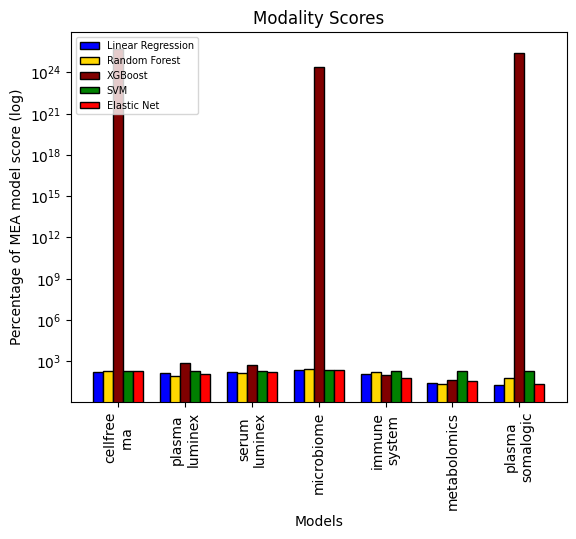

In [7]:
import matplotlib.pyplot as plt

# data for the plot
modalities = ['cellfree_rna', 'plasma_luminex', 'serum_luminex', 'microbiome','immune_system' , 'metabolomics' , 'plasma_somalogic']

# real-time parameters of each model with modality
rf_scores = [round(173.78669174740847), round(147.4427285714286), round(160.8392234951589), round(219.7667621388889), round(116.94795714285715), round(25.19224285714285), round(19.043803971830794)]
xgb_scores = [round(183.1879688188347), round(89.4537906572202), round(150.06109855244435), round(265.8658571195351), round(164.159799750906), round(21.04464490718874), round(65.3318218511739)]
lr_scores = [round(5.027819067060175e+25), round(775.9108551786297), round(551.456609428052), round(2.4611792996837517e+24), round(100.43604281694566), round(40.00368654925433), round(2.496558380951668e+25)]
svm_scores = [round(185.44084265666424), round(182.74168823689226), round(185.44706692226268), round(243.52993710055347), round(184.42571416394418), round(184.42571428571415), round(186.92561926731477)]
en_scores = [round(180.07455827171503), round(122.5289009039352), round(173.850236225529), round(219.04642449768517), round(58.077916974490236), round(37.55425619171592), round(21.02204920379668)]


# assign a color to each model
colors = ['blue', 'gold', 'maroon', 'green', 'red']

# create the figure and axes
fig, ax = plt.subplots()

# create the bar graphs for each model's score on each modality
for i, modality in enumerate(modalities):
    # calculate the x positions for the bars for the current modality
    x = [i + j*0.15 for j in range(5)]
    # create the bar graphs for each model's score on the current modality
    for j, score in enumerate([rf_scores[i], xgb_scores[i], lr_scores[i], svm_scores[i], en_scores[i]]):
        ax.bar(x[j], score, width=0.15, color=colors[j], edgecolor='black')
        # add extra space after every 5th bar graph
        if j == 4 and (i+1) % 5 == 0:
            ax.bar(x[j]+0.2, 0, width=0.1, color='white', edgecolor='black')

# set the overall title and axis labels
ax.set_title('Modality Scores')
ax.set_xlabel('Models')
ax.set_ylabel('Percentage of MEA model score (log)')
ax.set_yscale('log')

# add the legend to the plot
ax.legend(['Linear Regression','Random Forest', 'XGBoost', 'SVM', 'Elastic Net'], loc='upper left', fontsize=7)

# set the x-axis ticks and tick labels
x_ticks = [i + 0.3 for i in range(len(modalities))]
x_ticklabels = [label.replace('_', '\n') if '_' in label else label for label in modalities]
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticklabels, rotation=90, ha='center')

# display the plot
plt.show()


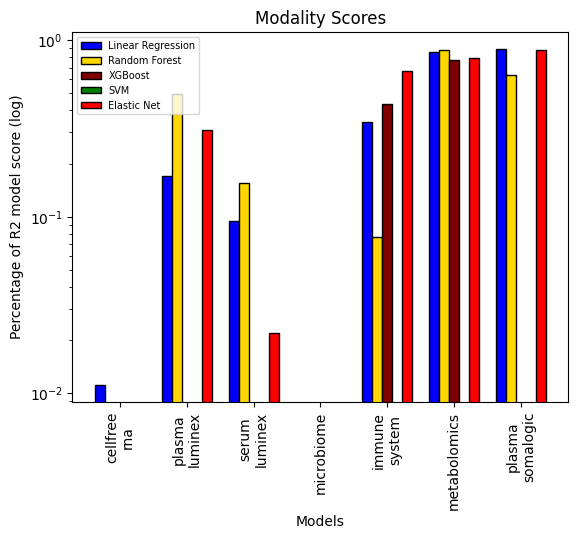

In [8]:
import matplotlib.pyplot as plt

# data modalities
modalities = ['cellfree_rna', 'plasma_luminex', 'serum_luminex', 'microbiome','immune_system' , 'metabolomics' , 'plasma_somalogic']

# parameters of each model with modality
lr_scores = [-2.8287525824376216e+23, -3.365431225852153, -2.1026062935355574, -1.3847091963659769e+22, 0.4349265323615309, 0.7749311776658768, -1.4046141822387892e+23]
rf_scores = [0.011120732044553217, 0.17045742170680578, 0.09508603481783306, -0.236452202520947, 0.34202716651835685, 0.8582633521830239, 0.8928557114998755]
xgb_scores = [-0.030652521413772726, 0.4967149017190011, 0.15572594321327615, -0.49581502412460576, 0.0764038019583323, 0.8815985761744985, 0.6324299715007009]
svm_scores = [-0.043327644765800644, -0.028141656699224527, -0.04336266374152453, -0.37014862564826134, -0.0376163267828189, -0.03761632746792132, -0.05168129794166254]
en_scores = [-0.013135844683989761, 0.31062764941954535, 0.021883448626354607, -0.232399437424184, 0.6732419058185237, 0.7887121677074282, 0.881725704166715]

colors = ['blue', 'gold', 'maroon', 'green', 'red']
fig, ax = plt.subplots()

for i, modality in enumerate(modalities):
    x = [i + j*0.15 for j in range(5)]
    for j, score in enumerate([rf_scores[i], xgb_scores[i], lr_scores[i], svm_scores[i], en_scores[i]]):
        ax.bar(x[j], score, width=0.15, color=colors[j], edgecolor='black')
        if j == 4 and (i+1) % 5 == 0:
            ax.bar(x[j]+0.2, 0, width=0.1, color='white', edgecolor='black')

ax.set_title('Modality Scores')
ax.set_xlabel('Models')
ax.set_ylabel('Percentage of R2 model score (log)')
ax.set_yscale('log')

# plot
ax.legend(['Linear Regression','Random Forest', 'XGBoost', 'SVM', 'Elastic Net'], loc='upper left', fontsize=7)
x_ticks = [i + 0.3 for i in range(len(modalities))]
x_ticklabels = [label.replace('_', '\n') if '_' in label else label for label in modalities]
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticklabels, rotation=90, ha='center')

plt.show()


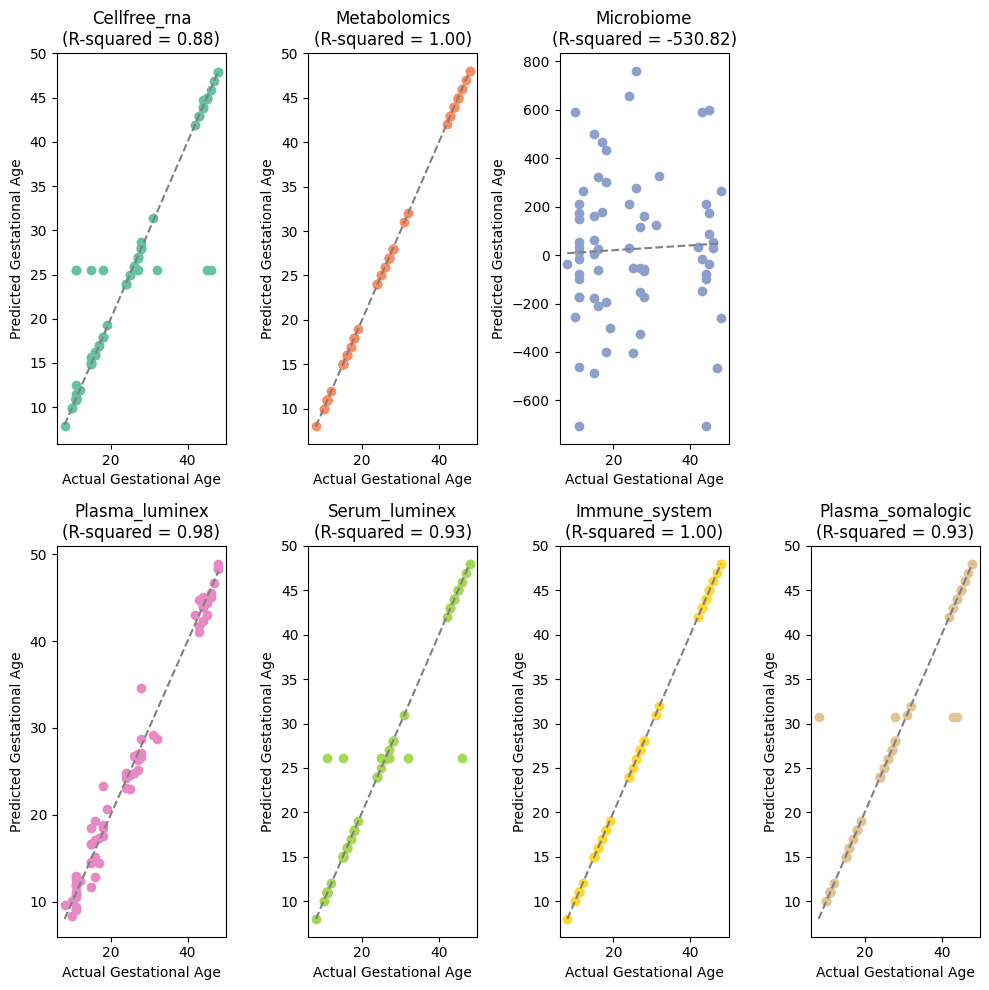

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import pickle

with open("multiomics_data.pickle", "rb") as file:
    data_multiomics = pickle.load(file)

# Define the modalities
modalities = [
    "cellfree_rna",
    "metabolomics",
    "microbiome",
    "plasma_luminex",
    "serum_luminex",
    "immune_system",
    "plasma_somalogic"
]

colors = sns.color_palette("Set2", len(modalities))

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(10, 10))

# Iterate over the modalities and build/evaluate the linear regression models
for i, modality in enumerate(modalities):
    x = data_multiomics[modality]
    y = data_multiomics["gestational_age"]

    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)
    r_squared = model.score(x, y)

    # Plots
    if i < 3:
        row = 0
        col = i
    else:
        row = 1
        col = i - 3
    axs[row, col].scatter(y, y_pred, color=colors[i])
    axs[row, col].plot([min(y), max(y)], [min(y), max(y)], '--', color='gray')
    axs[row, col].set_xlabel('Actual Gestational Age')
    axs[row, col].set_ylabel('Predicted Gestational Age')
    axs[row, col].set_title('{}\n(R-squared = {:.2f})'.format(modality.capitalize(), r_squared))

fig.delaxes(axs[0, 3])

plt.tight_layout()
plt.show()


In [10]:
import numpy as np
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedKFold
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)

np.random.seed(42)

X = data_multiomics['immune_system'].copy()
y = data_multiomics['gestational_age'].copy()
scaler = StandardScaler()
X = scaler.fit_transform(X)

# define grid
ratios = np.arange(0, 1, 0.01)
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = ElasticNet()

model = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv=10)
# fit model
model.fit(X, y)
yhat = model.predict(X_test)
mse = mean_squared_error(y_test, yhat)

mse_on_train = mean_squared_error(y_train, model.predict(X_train))

print('alpha: %f' % model.alpha_)
print('l1_ratio_: %f' % model.l1_ratio_)

print(f'Mse of test:{mse}, Mse on train: {mse_on_train}')


alpha: 1.000000
l1_ratio_: 0.970000
Mse of test:41.366302719668546, Mse on train: 37.04366018395566


In [11]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler

np.random.seed(42)

X = data_multiomics['immune_system'].copy()
y= data_multiomics['gestational_age'].copy()
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

elastic_net = ElasticNet( alpha=1.0091666666666665, l1_ratio=0.9, random_state=42)

elastic_net.fit(X_train, y_train)
y_pred_train = elastic_net.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)

# Predict the test set results
y_pred = elastic_net.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred)


print(f'MSE train:{mse_train} , test {mse_test}')

MSE train:31.841907496872725 , test 107.94988740705377


# SVM Model

In [12]:
from sklearn.model_selection import GroupKFold
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import numpy as np

np.random.seed(42)
group_size = 4


X = data_multiomics['immune_system'].copy()
y=data_multiomics['gestational_age'].copy()
scaler = StandardScaler()
X = scaler.fit_transform(X)

outer_results_mse = []
outer_results_train = []
results_on_validation=[]

inner_params_C = []
inner_params_gamma = []
inner_params_kernel = []

subject_ids = np.repeat(np.arange(1, len(X)//group_size+1), group_size)
cv_outer = GroupKFold(n_splits=len(X)//group_size)

model = SVR()

# hyperparameter tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': ['scale', 'auto',0.001,0.01, 0.1, 1, 10,100],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

scores = []

for i, ( train_idx, test_idx) in enumerate (cv_outer.split(X, y, groups=subject_ids) ):
    # split data
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    subject_ids_inner = np.repeat(np.arange(1, len(X_train)//group_size+1), group_size)

    cv_inner = GroupKFold(n_splits=len(X_train)//group_size)
    search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=cv_inner, refit=True)
    result = search.fit(X_train, y_train, groups=subject_ids_inner)
    best_model = result.best_estimator_
    yhat = best_model.predict(X_test)

    acc = mean_squared_error(y_test, yhat)
    mse_on_train= mean_squared_error(y_train, best_model.predict(X_train))
    scores.append(acc)

    outer_results_mse.append(acc)
    outer_results_train.append(mse_on_train)
    results_on_validation.append(-result.best_score_)

    best_parameters = best_model.get_params()
    best_C, best_gamma,best_kernel = best_parameters['C'], best_parameters['gamma'],best_parameters['kernel']

    inner_params_C.append(best_C)
    inner_params_gamma.append(best_gamma)
    inner_params_kernel.append(best_kernel)

    print(f'Round {i+1}: Mse of test:{mse}, Mse on validation: {-result.best_score_}, Mse on train: {mse_on_train}')
    print(f'Round: {i+1}, Best Score: {result.best_score_}, Best Params: {result.best_params_}')

# report performance
print('MSE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Round 1: Mse of test:41.366302719668546, Mse on validation: 117.43185266759409, Mse on train: 88.4976392277035
Round: 1, Best Score: -117.43185266759409, Best Params: {'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
Round 2: Mse of test:41.366302719668546, Mse on validation: 120.1939826139763, Mse on train: 89.12894740441278
Round: 2, Best Score: -120.1939826139763, Best Params: {'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
Round 3: Mse of test:41.366302719668546, Mse on validation: 109.53990426884188, Mse on train: 94.3633125011404
Round: 3, Best Score: -109.53990426884188, Best Params: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
Round 4: Mse of test:41.366302719668546, Mse on validation: 107.60925813946918, Mse on train: 91.30755387440082
Round: 4, Best Score: -107.60925813946918, Best Params: {'C': 10, 'gamma': 'auto', 'kernel': 'sigmoid'}
Round 5: Mse of test:41.366302719668546, Mse on validation: 119.43549103453242, Mse on train: 69.86241978515913
Round: 5, Best Score: -

In [13]:
dsvr = {'Mse of test': outer_results_mse, 'Mse on validation': results_on_validation,
     'Mse on train':outer_results_train, 'C': inner_params_C,
     'gamma': inner_params_gamma,'kernel':inner_params_kernel}
dfsvr = pd.DataFrame(data=dsvr)
display(dfsvr, dfsvr.mean())


# 'C': [0.001, 0.01, 0.1, 1, 10]

<ipython-input-13-49882d17e10d>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(dfsvr, dfsvr.mean())


,Mse of test,Mse on validation,Mse on train,C,gamma,kernel
0,148.487205,117.431853,88.497639,0.01,scale,linear
1,109.420194,120.193983,89.128947,0.01,scale,linear
2,207.305255,109.539904,94.363313,10.00,scale,sigmoid
3,205.318250,107.609258,91.307554,10.00,auto,sigmoid
4,110.839291,119.435491,69.862420,10.00,0.001,rbf
5,160.695996,110.991372,92.043993,10.00,scale,sigmoid
6,95.785193,118.974822,93.493992,0.01,scale,linear
7,27.414625,121.854052,102.169519,10.00,scale,sigmoid
8,143.733266,110.514553,94.251785,10.00,scale,sigmoid
9,121.628379,115.468618,98.226695,10.00,auto,sigmoid


Mse of test          129.429077
Mse on validation    116.402414
Mse on train          89.407863
C                      6.474118
dtype: float64

In [14]:
mse_train_svm =dfsvr['Mse on train'].mean() #  89.40786324895092
mse_val_svm = dfsvr['Mse on validation'].mean() # 116.40241377655448
mse_test_svm = dfsvr['Mse of test'].mean()  # 129.42907735296546


mse_train_svm, mse_val_svm,mse_test_svm

(89.40786324895092, 116.40241377655448, 129.42907735296546)

# Predicting Sex of Baby

In [23]:
import numpy as np
import pickle

with open("multiomics_data.pickle", "rb") as file:
    data_multiomics = pickle.load(file)

from sklearn.preprocessing import StandardScaler

X=data_multiomics['immune_system']
y=data_multiomics['sex_bin'].values
display(y.shape, X.shape)
scaler = StandardScaler()
X = scaler.fit_transform(X)

(68,)

(68, 534)

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)

batch_size = 10 # Choose a batch size
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(X.shape[1], 128)
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

model = Net()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())


epochs = 100

for epoch in range(epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs.view(-1), labels)

        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

Epoch 1/100, Loss: 0.6014176607131958
Epoch 2/100, Loss: 0.2739042043685913
Epoch 3/100, Loss: 0.253431499004364
Epoch 4/100, Loss: 0.2179785966873169
Epoch 5/100, Loss: 0.14553415775299072
Epoch 6/100, Loss: 0.12008136510848999
Epoch 7/100, Loss: 0.08403559029102325
Epoch 8/100, Loss: 0.08777552843093872
Epoch 9/100, Loss: 0.06331133842468262
Epoch 10/100, Loss: 0.026786115020513535
Epoch 11/100, Loss: 0.025544270873069763
Epoch 12/100, Loss: 0.012739057652652264
Epoch 13/100, Loss: 0.017275258898735046
Epoch 14/100, Loss: 0.014141300693154335
Epoch 15/100, Loss: 0.011587771587073803
Epoch 16/100, Loss: 0.0076465182937681675
Epoch 17/100, Loss: 0.007900247350335121
Epoch 18/100, Loss: 0.008997427299618721
Epoch 19/100, Loss: 0.007764665875583887
Epoch 20/100, Loss: 0.006095823831856251
Epoch 21/100, Loss: 0.005503504537045956
Epoch 22/100, Loss: 0.00437709828838706
Epoch 23/100, Loss: 0.006991145666688681
Epoch 24/100, Loss: 0.003379320725798607
Epoch 25/100, Loss: 0.00349188037216663

In [27]:
model.eval()

correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        labels = labels.flatten()
        outputs = model(inputs)
        predicted = (outputs.view(-1) > 0.5).float()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test Accuracy: {100 * correct / total}%') #Test Accuracy: 82.14285714285714%

Test Accuracy: 82.14285714285714%


In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)

batch_size = 10
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(X.shape[1], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc3(x))
        return x
model = Net()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


epochs = 1000

for epoch in range(epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs.view(-1), labels)

        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

Epoch 1/1000, Loss: 0.6432033777236938
Epoch 2/1000, Loss: 0.5960643291473389
Epoch 3/1000, Loss: 0.5616978406906128
Epoch 4/1000, Loss: 0.45583686232566833
Epoch 5/1000, Loss: 0.4846310019493103
Epoch 6/1000, Loss: 0.5377711057662964
Epoch 7/1000, Loss: 0.3265218734741211
Epoch 8/1000, Loss: 0.3516235947608948
Epoch 9/1000, Loss: 0.3026314377784729
Epoch 10/1000, Loss: 0.21130219101905823
Epoch 11/1000, Loss: 0.30571359395980835
Epoch 12/1000, Loss: 0.1592741161584854
Epoch 13/1000, Loss: 0.1764669418334961
Epoch 14/1000, Loss: 0.17755118012428284
Epoch 15/1000, Loss: 0.22943194210529327
Epoch 16/1000, Loss: 0.07923786342144012
Epoch 17/1000, Loss: 0.05104571580886841
Epoch 18/1000, Loss: 0.06109301373362541
Epoch 19/1000, Loss: 0.038970865309238434
Epoch 20/1000, Loss: 0.016501516103744507
Epoch 21/1000, Loss: 0.033657725900411606
Epoch 22/1000, Loss: 0.027106154710054398
Epoch 23/1000, Loss: 0.014214461669325829
Epoch 24/1000, Loss: 0.01703733578324318
Epoch 25/1000, Loss: 0.0094459

In [31]:
model.eval()

correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        labels = labels.flatten()
        outputs = model(inputs)
        predicted = (outputs.view(-1) > 0.5).float()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test Accuracy: {100 * correct / total}%')  #Test Accuracy: 85.71428571428571%

Test Accuracy: 85.71428571428571%
